In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('clean_california_housing.csv', index_col = 0)
df.head(10)

,STATE/REGION/COUNTY,Q32022,Q22022,Q32021,S.F. Bay Area,Southern California,Central Coast,Central Valley,Far North,Other Counties,region
1,Alameda,17.185421,14.983912,18.960527,1,0,0,0,0,0,S.F. Bay Area
2,Contra Costa,25.253664,21.747257,31.427381,1,0,0,0,0,0,S.F. Bay Area
3,Marin,18.433956,16.504137,21.942066,1,0,0,0,0,0,S.F. Bay Area
4,Napa,13.250840,15.442713,23.104195,1,0,0,0,0,0,S.F. Bay Area
5,San Francisco,20.465951,16.893673,20.534223,1,0,0,0,0,0,S.F. Bay Area
6,San Mateo,18.533543,15.027468,19.486564,1,0,0,0,0,0,S.F. Bay Area
7,Santa Clara,20.240516,17.852627,22.152901,1,0,0,0,0,0,S.F. Bay Area
8,Solano,29.917384,28.432095,41.736598,1,0,0,0,0,0,S.F. Bay Area
9,Sonoma,18.759466,17.268517,28.239133,1,0,0,0,0,0,S.F. Bay Area
11,Los Angeles,13.369144,15.940141,18.893788,0,1,0,0,0,0,Southern California


In [113]:
df['region'].value_counts()

Other County           14
Central Valley         12
S.F. Bay Area           9
Southern California     6
Far North               6
Central Coast           4
Name: region, dtype: int64

In [120]:
df[(df['region'] == 'Far North') | (df['region'] == 'Central Valley')]

,STATE/REGION/COUNTY,Q32022,Q22022,Q32021,S.F. Bay Area,Southern California,Central Coast,Central Valley,Far North,Other Counties,region
23,Fresno,31.878067,30.596693,42.430131,0,0,0,1,0,0,Central Valley
24,Glenn,34.202398,35.805262,44.493975,0,0,0,1,0,0,Central Valley
25,Kern,33.683771,32.009942,44.636813,0,0,0,1,0,0,Central Valley
26,Kings,39.737048,38.535333,55.979151,0,0,0,1,0,0,Central Valley
27,Madera,33.892689,32.490325,43.431372,0,0,0,1,0,0,Central Valley
28,Merced,33.688233,33.909116,44.264500,0,0,0,1,0,0,Central Valley
29,Placer,29.780975,26.704424,38.035381,0,0,0,1,0,0,Central Valley
30,Sacramento,28.701388,26.730051,39.318625,0,0,0,1,0,0,Central Valley
31,San Benito,20.228664,16.562413,27.036312,0,0,0,1,0,0,Central Valley
32,San Joaquin,29.183594,26.090970,37.247962,0,0,0,1,0,0,Central Valley


In [103]:
median_df = df['Q32022'].groupby(by = df['region']).median().reset_index()

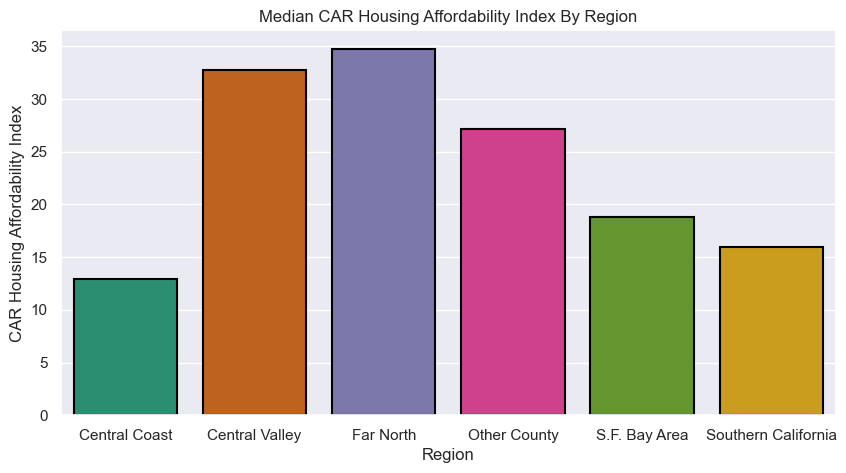

In [104]:
sns.barplot(x = median_df['region'], y = median_df['Q32022'], edgecolor = 'black', linewidth = 1.5, palette = 'Dark2')
plt.xlabel('Region')
plt.ylabel('CAR Housing Affordability Index')
plt.title('Median CAR Housing Affordability Index By Region')
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(10, 5)

In [105]:
import plotly.express as px
fig = px.bar(median_df, x = 'region', y = 'Q32022', 
             labels={'x': 'Region', 'y': 'CAR Housing Affordability Index'}, 
             template = 'ggplot2', color = 'region')
fig.update_layout(
    title="Median CAR Housing Affordability Index By Region (Q32022)",
    xaxis_title="Region",
    yaxis_title="CAR Housing Affordability Index",
    legend_title_text='Region'
)

In [110]:
quarters = ['Q32021', 'Q22022', 'Q32022']
medians = {}
for i in quarters:
    medians[i] = df[i].groupby(by = df['region']).median()
df_medians = pd.DataFrame(medians).transpose()
df_medians

region,Central Coast,Central Valley,Far North,Other County,S.F. Bay Area,Southern California
Q32021,18.446265,42.930752,39.671051,34.791459,22.152901,23.731809
Q22022,12.635503,31.303317,32.197632,26.075249,16.893673,15.563656
Q32022,12.960322,32.780919,34.774091,27.102053,18.759466,15.924477


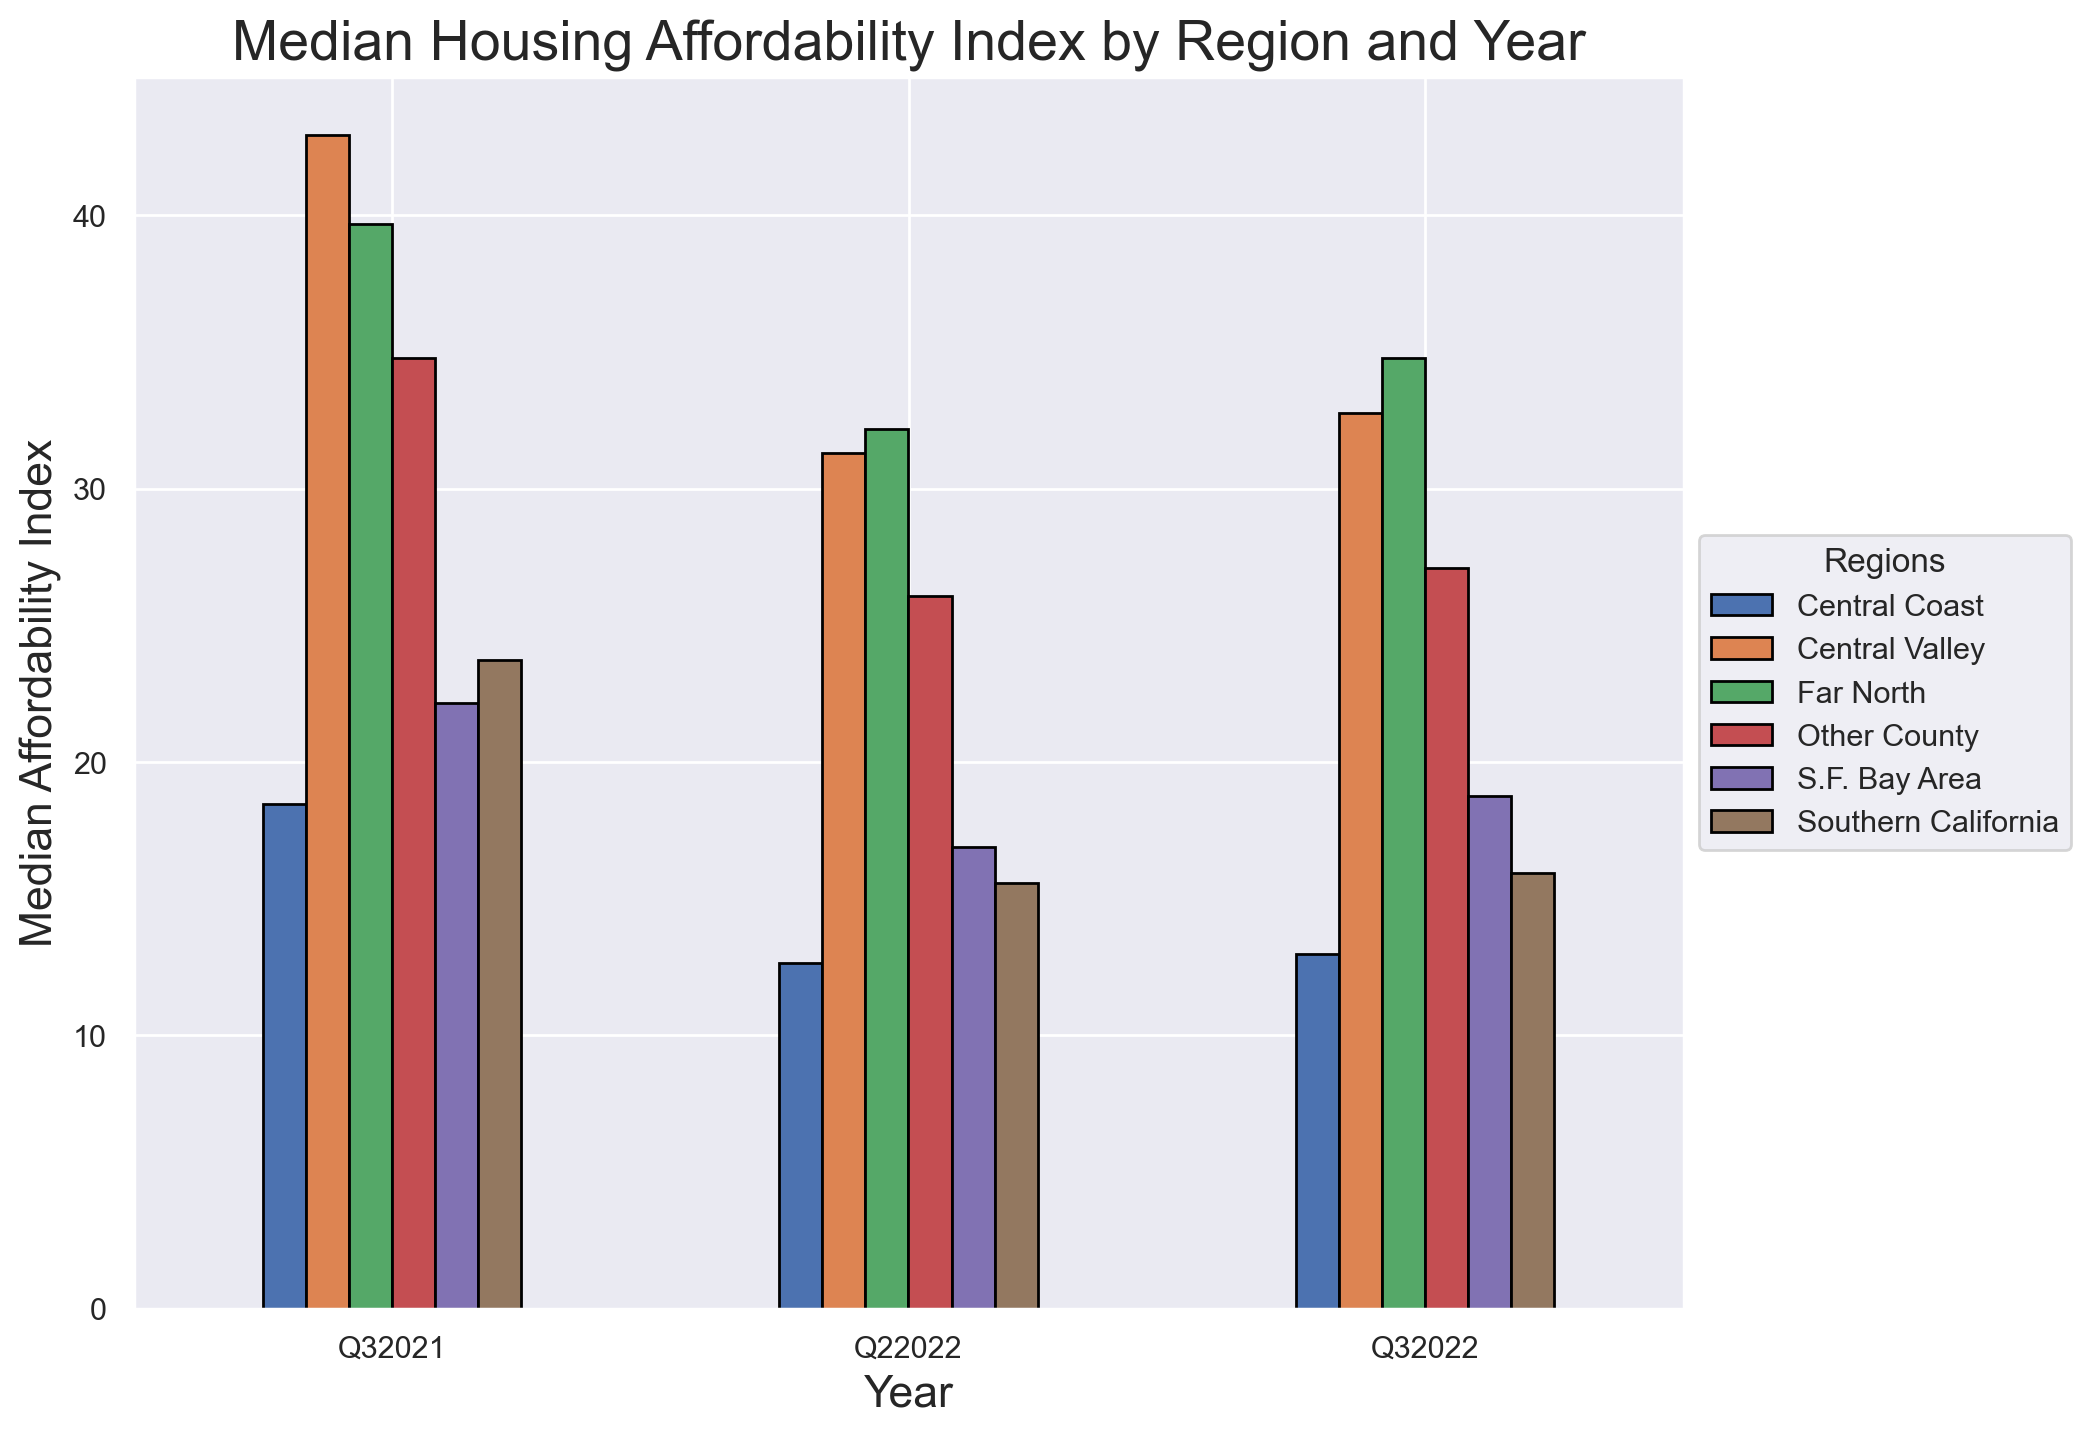

In [108]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 8), dpi = 200)
df_medians.plot(ax = ax, kind = 'bar', edgecolor = 'black')
ax.set_title('Median Housing Affordability Index by Region and Year', fontsize = 20)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Median Affordability Index', fontsize = 16)
ax.set_xticklabels(df_medians.index, rotation=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title = 'Regions')

In [109]:
fig.savefig('car_barplot.png', dpi=200, bbox_inches='tight')